## Extraction des valeures immo 2024
Script d'extraction des données d'un dataset immobilier français pour l'année 2024.

In [ ]:
import pandas as pd

data = open('data/ValeursFoncieres-2024.txt', 'r', encoding='utf-8')
df = pd.read_csv(data, sep='|')
df.info()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

/var/folders/4p/b2z8znkj2_q5zj_03_ts9tnr0000gn/T/ipykernel_36415/3887983539.py:4: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489149 entries, 0 to 3489148
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [2]:
# Cleaning columns names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
df.columns

Index(['identifiant_de_document', 'reference_document', '1_articles_cgi',
       '2_articles_cgi', '3_articles_cgi', '4_articles_cgi', '5_articles_cgi',
       'no_disposition', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'no_voie', 'b/t/q', 'type_de_voie', 'code_voie', 'voie', 'code_postal',
       'commune', 'code_departement', 'code_commune', 'prefixe_de_section',
       'section', 'no_plan', 'no_volume', '1er_lot',
       'surface_carrez_du_1er_lot', '2eme_lot', 'surface_carrez_du_2eme_lot',
       '3eme_lot', 'surface_carrez_du_3eme_lot', '4eme_lot',
       'surface_carrez_du_4eme_lot', '5eme_lot', 'surface_carrez_du_5eme_lot',
       'nombre_de_lots', 'code_type_local', 'type_local', 'identifiant_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'nature_culture',
       'nature_culture_speciale', 'surface_terrain'],
      dtype='object')

In [3]:
df['valeur_fonciere'] = df['valeur_fonciere'].fillna(0)

In [4]:
df.isna().sum()

identifiant_de_document       3225679
reference_document            3225679
1_articles_cgi                3225679
2_articles_cgi                3225679
3_articles_cgi                3225679
4_articles_cgi                3225679
5_articles_cgi                3225679
no_disposition                      0
date_mutation                       0
nature_mutation                     0
valeur_fonciere                     0
no_voie                       1318788
b/t/q                         3090699
type_de_voie                  1366075
code_voie                       22351
voie                            22382
code_postal                     22671
commune                             0
code_departement                    0
code_commune                        0
prefixe_de_section            3066884
section                            92
no_plan                             0
no_volume                     3217633
1er_lot                       2208266
surface_carrez_du_1er_lot     2933363
2eme_lot    

In [5]:
colsToRemove = [
    'identifiant_de_document', 
    'reference_document'
]

df = df.drop(columns=colsToRemove)

df = df.drop(list(df.filter(regex='articles_cgi')), axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225679 entries, 0 to 3225678
Data columns (total 36 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   no_disposition              int64  
 1   date_mutation               object 
 2   nature_mutation             object 
 3   valeur_fonciere             float64
 4   no_voie                     float64
 5   b/t/q                       object 
 6   type_de_voie                object 
 7   code_voie                   object 
 8   voie                        object 
 9   code_postal                 float64
 10  commune                     object 
 11  code_departement            object 
 12  code_commune                int64  
 13  prefixe_de_section          float64
 14  section                     object 
 15  no_plan                     int64  
 16  no_volume                   object 
 17  1er_lot                     object 
 18  surface_carrez_du_1er_lot   float64
 19  2eme_lot             

In [ ]:
df['valeur_fonciere'] = (
    df['valeur_fonciere']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

df['valeur_fonciere'] = pd.to_numeric(df['valeur_fonciere'], errors='coerce')

df['valeur_fonciere'] = df['valeur_fonciere'].fillna(0)

In [49]:
def parseFloat(column):
    df[column] = (
        df[column]
        .astype(str)
        .str.replace(',', '.', regex=False)
    )

    df[column] = pd.to_numeric(df[column], errors='coerce')

    df[column] = df[column].fillna(0)
    

In [51]:
parseFloat('valeur_fonciere')
parseFloat('surface_carrez_du_1er_lot')
parseFloat('surface_carrez_du_2eme_lot')

In [54]:
df['surface_carrez_du_1er_lot'].describe().apply(lambda x: format(x, '.0f'))

count    3225679
mean           5
std           35
min            0
25%            0
50%            0
75%            0
max         8432
Name: surface_carrez_du_1er_lot, dtype: object

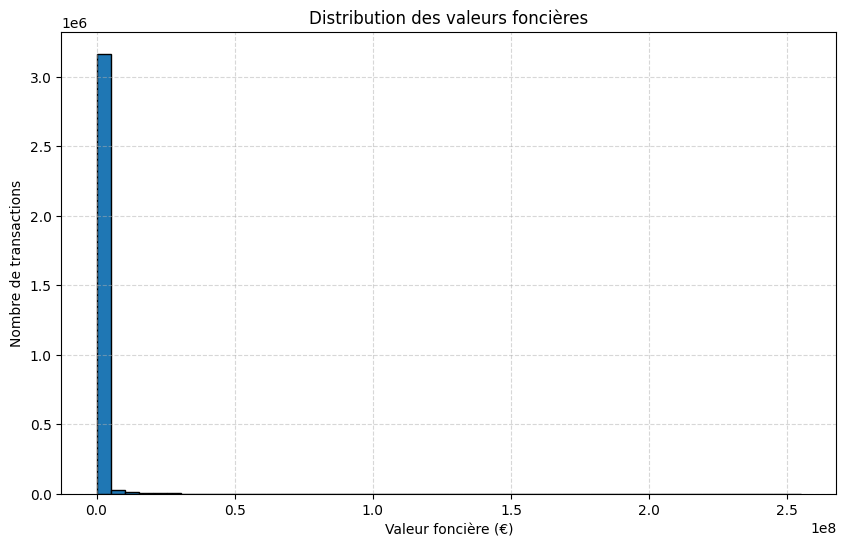

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['valeur_fonciere'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("Distribution des valeurs foncières")
plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

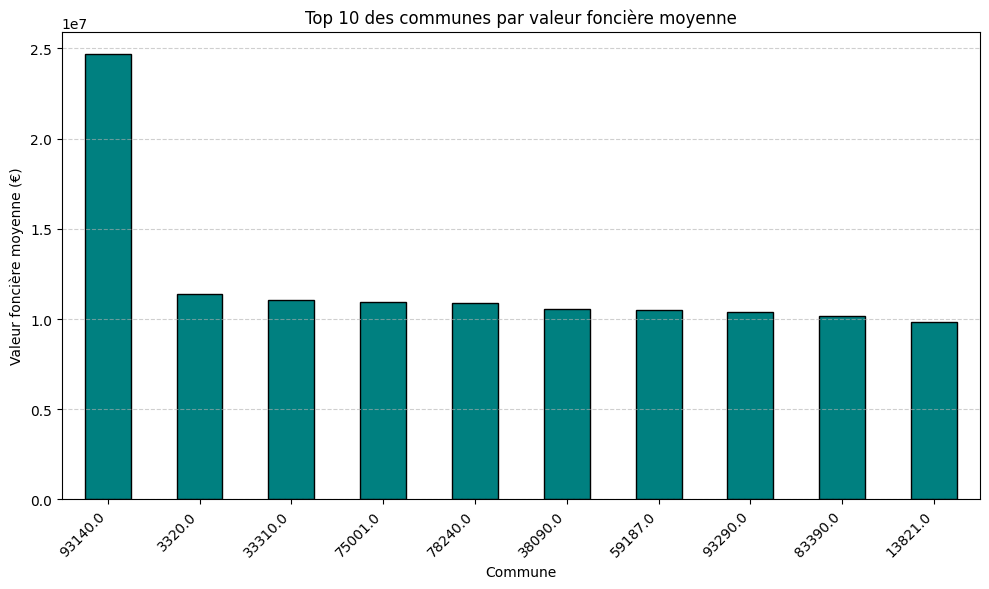

In [ ]:
top_communes = (
    df.groupby('code_postal')['valeur_fonciere']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_communes.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 des communes par valeur foncière moyenne")
plt.xlabel("Code Postal")
plt.ylabel("Valeur foncière moyenne (€)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
class Fruit:
    def __init__(self, product, price):
        self.product = product
        self.price = price
    
    def toString(self):
        print("La",self.product,"coute", self.price,"€")

inventory = [
    Fruit("Banane", 6.00),
    {"product": "Apple", "price": 5.70},
    {"product": "Orange", "price": 4.50},
    {"product": "Mango", "price": 8.60},
    {"product": "Banana", "price": 6.00},
    {"product": "Pepper", "price": 4.20},
    {"product": "Carrot", "price": 3.57}
]


banana = Fruit("Banane", 6.00)

print(inventory[0].toString())

La Banane coute 6.0 €
None


In [45]:
def cleanNumber(column):
    df[column] = (
        df[column]
        .astype(str)
        .str.replace(',', '.', regex=False)
    )

    df[column] = pd.to_numeric(df[column], errors='coerce')

    df[column] = df[column].fillna(0)

In [46]:
cleanNumber('surface_carrez_du_1er_lot')

In [48]:
df['surface_carrez_du_1er_lot'].describe().apply(lambda x: format(x, '.0f'))

count    3225679
mean           5
std           35
min            0
25%            0
50%            0
75%            0
max         8432
Name: surface_carrez_du_1er_lot, dtype: object

In [56]:
df.sort_values(by='valeur_fonciere', ascending=False).head(250)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,identifiant_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
3173217,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,4.0,Local industriel. commercial ou assimilé,NaN,450.0,0.0,S,NaN,871.0
3173226,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,4.0,Local industriel. commercial ou assimilé,NaN,595.0,0.0,S,NaN,871.0
3173220,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,4.0,Local industriel. commercial ou assimilé,NaN,597.0,0.0,S,NaN,871.0
3173219,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,2.0,Appartement,NaN,16.0,2.0,S,NaN,871.0
3173218,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,4.0,Local industriel. commercial ou assimilé,NaN,540.0,0.0,S,NaN,871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050479,1,25/11/2024,Vente,103038040.0,24.0,NaN,RTE,0082,D AULNAY,93140.0,...,NaN,1,2.0,Appartement,NaN,63.0,3.0,NaN,NaN,NaN
3050476,1,25/11/2024,Vente,103038040.0,24.0,NaN,RTE,0082,D AULNAY,93140.0,...,NaN,1,2.0,Appartement,NaN,58.0,3.0,NaN,NaN,NaN
3050442,1,25/11/2024,Vente,103038040.0,24.0,NaN,RTE,0082,D AULNAY,93140.0,...,NaN,1,2.0,Appartement,NaN,30.0,1.0,NaN,NaN,NaN
3050519,1,25/11/2024,Vente,103038040.0,24.0,NaN,RTE,0082,D AULNAY,93140.0,...,NaN,1,2.0,Appartement,NaN,81.0,4.0,NaN,NaN,NaN


In [57]:
df_clean = df.copy()

df_clean = df_clean.drop(df_clean[df_clean['type_local'] == 'Local industriel. commercial ou assimilé'].index)

In [59]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120350 entries, 0 to 3120349
Data columns (total 36 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   no_disposition              int64  
 1   date_mutation               object 
 2   nature_mutation             object 
 3   valeur_fonciere             float64
 4   no_voie                     float64
 5   b/t/q                       object 
 6   type_de_voie                object 
 7   code_voie                   object 
 8   voie                        object 
 9   code_postal                 float64
 10  commune                     object 
 11  code_departement            object 
 12  code_commune                int64  
 13  prefixe_de_section          float64
 14  section                     object 
 15  no_plan                     int64  
 16  no_volume                   object 
 17  1er_lot                     object 
 18  surface_carrez_du_1er_lot   float64
 19  2eme_lot             

In [60]:
df_clean.sort_values(by='valeur_fonciere', ascending=False).head(250)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,identifiant_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
3071222,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,2.0,Appartement,NaN,16.0,2.0,S,NaN,871.0
3071223,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,871.0
3074700,2,18/07/2024,Vente,250546032.0,4.0,NaN,RUE,6311,MEYERBEER,75009.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3073614,1,22/07/2024,Vente,178437408.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3071709,1,10/07/2024,Vente,148098496.0,247.0,NaN,RUE,8635,SAINT-HONORE,75001.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954396,1,25/11/2024,Vente,103038040.0,1.0,NaN,AV,8880,SUZANNE BUISSON,93140.0,...,NaN,0,2.0,Appartement,NaN,46.0,2.0,S,NaN,12033.0
2954395,1,25/11/2024,Vente,103038040.0,1.0,NaN,AV,8880,SUZANNE BUISSON,93140.0,...,NaN,0,2.0,Appartement,NaN,47.0,2.0,S,NaN,12033.0
2954394,1,25/11/2024,Vente,103038040.0,1.0,NaN,AV,8880,SUZANNE BUISSON,93140.0,...,NaN,0,2.0,Appartement,NaN,35.0,1.0,S,NaN,12033.0
2954393,1,25/11/2024,Vente,103038040.0,1.0,NaN,AV,8880,SUZANNE BUISSON,93140.0,...,NaN,0,2.0,Appartement,NaN,52.0,3.0,S,NaN,12033.0


zsh:1: command not found: python


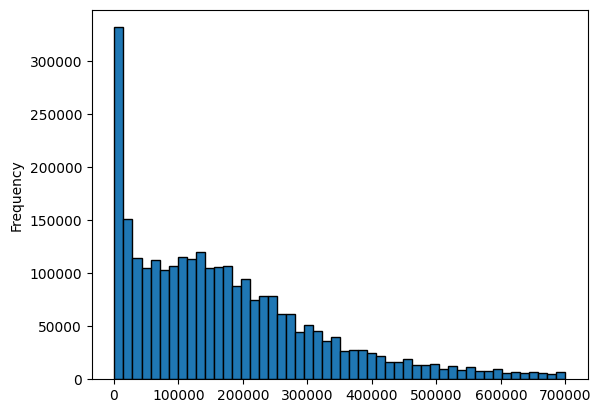

In [78]:
!python -m pip install matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
df_clean['valeur_fonciere'].plot(kind='hist', bins=50, edgecolor='black')
# plt.title("Distribution des valeurs foncières")
# plt.xlabel("Valeur foncière (€)")
# plt.ylabel("Nombre de transactions")
# plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [75]:
# df_clean = df_clean.drop(df_clean.nlargest(100000, 'valeur_fonciere').index)

df_clean = df_clean.drop(df_clean[df_clean['valeur_fonciere'] < 1000.0].index)
df_clean = df_clean.drop(df_clean[df_clean['valeur_fonciere'] > 700000.0].index)


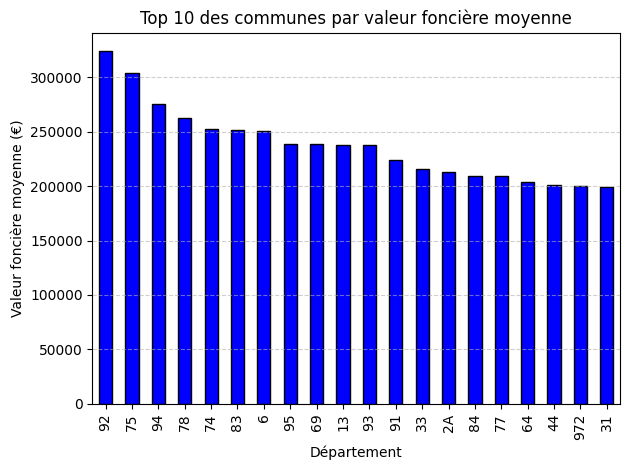

In [ ]:
top_communes = (
    df_clean.groupby('code_departement')['valeur_fonciere']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

top_communes.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 des communes par valeur foncière moyenne")
plt.xlabel("Département")
plt.ylabel("Valeur foncière moyenne (€)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [80]:
df_clean.to_csv('data/valeurs_foncieres_cleaned.csv', index=False)

In [91]:
top_communes

code_departement
92     324504.232384
75     304239.701044
94     275821.245329
78     262301.471999
74     252837.110263
83     251159.553064
6      250341.220441
95     238561.394905
69     238230.494756
13     238160.707286
93     237948.967715
91     224216.883650
33     215760.973910
2A     213057.522940
84     209697.107515
77     209450.466162
64     203284.067609
44     200575.214538
972    200307.871383
31     199250.161901
Name: valeur_fonciere, dtype: float64

In [86]:
df_clean.head()

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,nombre_de_lots,code_type_local,type_local,identifiant_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,dpt
1,2,03/01/2024,Vente,10000.0,NaN,NaN,NaN,B007,CHEVRY DESSOUS,1170.0,...,0,NaN,NaN,NaN,NaN,NaN,S,NaN,115.0,1170.0
2,1,08/01/2024,Vente,249000.0,NaN,NaN,NaN,B086,PIN HAMEAU,1290.0,...,0,NaN,NaN,NaN,NaN,NaN,S,NaN,497.0,1290.0
3,1,03/01/2024,Vente,329500.0,29.0,NaN,PL,0500,DU JURA,1170.0,...,2,2.0,Appartement,NaN,89.0,4.0,NaN,NaN,NaN,NaN
4,1,03/01/2024,Vente,329500.0,9001.0,NaN,PL,0500,DU JURA,1170.0,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1,03/01/2024,Vente,329500.0,29.0,NaN,PL,0500,DU JURA,1170.0,...,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,NaN
